<a href="https://colab.research.google.com/github/Santiagoguii/Big-data/blob/main/Dengue2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**SINAN**

A escolha do dataset sobre dengue do Sistema de Informação de Agravos de Notificação (SINAN) para o ano de 2023 é relevante por várias razões:

**Importância da Saúde Pública:** A dengue é uma doença viral transmitida por mosquitos e representa um grande desafio de saúde pública, especialmente aqui no Brasil. Monitorar e analisar os casos de dengue são essencias para entender a epidemologia e elaborar estratégias de prevenção e controle.

**Disponibilidade de Dados Abertos:** O SINAN oferece dados abertos sobre casos de dengue notificados ao sistema de saúde, possibilitando análises epidemiológicas e estudos de saúde pública.

**Análise Epidemiológica:** O dataset oferece dados detalhados sobre casos de dengue, incluindo informações como data de notificação, localização geográfica, características demográficas dos pacientes, tipo de dengue e evolução do caso. Isso permite análises epidemiológicas para compreender padrões de incidência, identificar áreas de alto risco e avaliar as intervenções de saúde pública.

**Prevenção e Controle:** Através de dados, pode-se saber áreas e populações mais afetadas pela dengue, direcionando recursos para programas de prevenção e controle, como campanhas e medidas de controle.

**Pesquisa Científica:** O dataset serve de base para estudos acadêmicos e pesquisas sobre dengue, incluindo modelagem epidemiológica, análise de fatores de risco, avaliação de intervenções de saúde e elaboração de novas estratégias de controle de doença.

In [ ]:
pip install pysus

In [ ]:
from pysus.online_data import SINAN
from IPython.display import display
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Listando as doenças disponíveis
SINAN.list_diseases()

{'ACBI': 'Acidente de trabalho com material biológico',
 'ACGR': 'Acidente de trabalho',
 'ANIM': 'Acidente por Animais Peçonhentos',
 'ANTR': 'Atendimento Antirrabico',
 'BOTU': 'Botulismo',
 'CANC': 'Cancêr relacionado ao trabalho',
 'CHAG': 'Doença de Chagas Aguda',
 'CHIK': 'Febre de Chikungunya',
 'COLE': 'Cólera',
 'COQU': 'Coqueluche',
 'DENG': 'Dengue',
 'DERM': 'Dermatoses ocupacionais',
 'DIFT': 'Difteria',
 'ESQU': 'Esquistossomose',
 'EXAN': 'Doença exantemáticas',
 'FMAC': 'Febre Maculosa',
 'FTIF': 'Febre Tifóide',
 'HANS': 'Hanseníase',
 'HANT': 'Hantavirose',
 'HEPA': 'Hepatites Virais',
 'IEXO': 'Intoxicação Exógena',
 'INFL': 'Influenza Pandêmica',
 'LEIV': 'Leishmaniose Visceral',
 'LEPT': 'Leptospirose',
 'LERD': 'LER/Dort',
 'LTAN': 'Leishmaniose Tegumentar Americana',
 'MALA': 'Malária',
 'MENI': 'Meningite',
 'MENT': 'Transtornos mentais relacionados ao trabalho',
 'NTRA': 'Notificação de Tracoma',
 'PAIR': 'Perda auditiva por ruído relacionado ao trabalho',
 'PE

In [ ]:
#Baixando os dados sobre Dengue
SINAN.download('Deng', years=2023)

DENGBR23.parquet: 100%|██████████| 2.47M/2.47M [05:32<00:00, 7.42kB/s]


/root/pysus/DENGBR23.parquet

In [ ]:
# Carregando o conjunto de dados
df_dengue = pd.read_parquet('/root/pysus/DENGBR23.parquet')

In [ ]:
display(df_dengue.head())

,TP_NOT,ID_AGRAVO,DT_NOTIFIC,SEM_NOT,NU_ANO,SG_UF_NOT,ID_MUNICIP,ID_REGIONA,ID_UNIDADE,DT_SIN_PRI,...,PLAQ_MENOR,CON_FHD,COMPLICA,TP_SISTEMA,NDUPLIC_N,DT_DIGITA,CS_FLXRET,FLXRECEBI,MIGRADO_W,Mes_Notificacao
0,2,A90,20230330,202313,2023,35,354140,1346,6905102,20230327,...,,,,2,,20230401,1,,,03
1,2,A90,20230330,202313,2023,35,354140,1346,7958250,20230329,...,,,,2,,20230330,1,,,03
2,2,A90,20230330,202313,2023,35,354140,1346,7958250,20230329,...,,,,2,,20230426,1,,,03
3,2,A90,20230331,202313,2023,35,354140,1346,7958250,20230328,...,,,,2,,20230331,1,,,03
4,2,A90,20230401,202313,2023,35,354140,1346,2047055,20230328,...,,,,2,,20230402,1,,,04


In [ ]:
# Verificando o número de registros e variáveis
print("Número de registros:", len(df_dengue))
print("Número de variáveis:", len(df_dengue.columns))

Número de registros: 1512277
Número de variáveis: 121


In [ ]:
# Verificando informações (variáveis e possíveis lacunas nos dados)
print(df_dengue.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512277 entries, 0 to 1512276
Columns: 121 entries, TP_NOT to MIGRADO_W
dtypes: object(121)
memory usage: 1.4+ GB
None


In [ ]:
# Verificando estatísticas descritivas das variáveis numéricas
display(df_dengue.describe())

,TP_NOT,ID_AGRAVO,DT_NOTIFIC,SEM_NOT,NU_ANO,SG_UF_NOT,ID_MUNICIP,ID_REGIONA,ID_UNIDADE,DT_SIN_PRI,...,EVIDENCIA,PLAQ_MENOR,CON_FHD,COMPLICA,TP_SISTEMA,NDUPLIC_N,DT_DIGITA,CS_FLXRET,FLXRECEBI,MIGRADO_W
count,1512277,1512277,1512277,1512277,1512277,1512277,1512277,1512277,1512277,1512277,...,1512277,1512277,1512277,1512277,1512277,1512277,1512277,1512277,1512277,1512277
unique,2,1,364,52,1,26,4536,311,26965,364,...,1,1,1,1,2,2,453,3,1,1
top,2,A90,20230410,202315,2023,31,411370,,7037112,20230410,...,,,,,2,,,0,,
freq,1512273,1512277,22566,106024,1512277,406701,47306,97907,11560,19047,...,1512277,1512277,1512277,1512277,1489042,1509772,23231,907113,1512277,1512277


In [ ]:
# Verificando valores ausentes das variáveis
print("Valores ausentes por variável:")
print(df_dengue.isnull().sum())

Valores ausentes por variável:
TP_NOT        0
ID_AGRAVO     0
DT_NOTIFIC    0
SEM_NOT       0
NU_ANO        0
             ..
NDUPLIC_N     0
DT_DIGITA     0
CS_FLXRET     0
FLXRECEBI     0
MIGRADO_W     0
Length: 121, dtype: int64


In [ ]:
df_dengue.columns

Index(['TP_NOT', 'ID_AGRAVO', 'DT_NOTIFIC', 'SEM_NOT', 'NU_ANO', 'SG_UF_NOT',
       'ID_MUNICIP', 'ID_REGIONA', 'ID_UNIDADE', 'DT_SIN_PRI',
       ...
       'EVIDENCIA', 'PLAQ_MENOR', 'CON_FHD', 'COMPLICA', 'TP_SISTEMA',
       'NDUPLIC_N', 'DT_DIGITA', 'CS_FLXRET', 'FLXRECEBI', 'MIGRADO_W'],
      dtype='object', length=121)

In [ ]:
df_dengue = df_dengue.dropna()
display(df_dengue.head())

,TP_NOT,ID_AGRAVO,DT_NOTIFIC,SEM_NOT,NU_ANO,SG_UF_NOT,ID_MUNICIP,ID_REGIONA,ID_UNIDADE,DT_SIN_PRI,...,EVIDENCIA,PLAQ_MENOR,CON_FHD,COMPLICA,TP_SISTEMA,NDUPLIC_N,DT_DIGITA,CS_FLXRET,FLXRECEBI,MIGRADO_W
0,2,A90,20230330,202313,2023,35,354140,1346,6905102,20230327,...,,,,,2,,20230401,1,,
1,2,A90,20230330,202313,2023,35,354140,1346,7958250,20230329,...,,,,,2,,20230330,1,,
2,2,A90,20230330,202313,2023,35,354140,1346,7958250,20230329,...,,,,,2,,20230426,1,,
3,2,A90,20230331,202313,2023,35,354140,1346,7958250,20230328,...,,,,,2,,20230331,1,,
4,2,A90,20230401,202313,2023,35,354140,1346,2047055,20230328,...,,,,,2,,20230402,1,,


# **Tratamento de dados**

In [ ]:
colunas_interessantes = ['DT_NOTIFIC', 'SG_UF_NOT', 'ID_MUNICIP', 'DT_SIN_PRI', 'EVOLUCAO', 'CLASSI_FIN', 'NU_IDADE_N', 'CS_SEXO', 'Mes_Notificacao']
df_dengue_reduzido = df_dengue[colunas_interessantes]

In [ ]:
df_dengue_reduzido['EVOLUCAO'].fillna('IGNORADO', inplace=True)

<ipython-input-109-7ef543b348fe>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_dengue_reduzido['EVOLUCAO'].fillna('IGNORADO', inplace=True)
<ipython-input-109-7ef543b348fe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dengue_reduzido['EVOLUCAO'].fillna('IGNORADO', inplace=True)


In [ ]:
df_dengue_reduzido['DT_NOTIFIC'] = pd.to_datetime(df_dengue_reduzido['DT_NOTIFIC'], format='%Y%m%d', errors='coerce')

<ipython-input-110-1cf7fe1d1d8e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dengue_reduzido['DT_NOTIFIC'] = pd.to_datetime(df_dengue_reduzido['DT_NOTIFIC'], format='%Y%m%d', errors='coerce')


In [ ]:
display(df_dengue_reduzido.head())

,DT_NOTIFIC,SG_UF_NOT,ID_MUNICIP,DT_SIN_PRI,EVOLUCAO,CLASSI_FIN,NU_IDADE_N,CS_SEXO,Mes_Notificacao
0,2023-03-30,NaN,354140,20230327,1,10,4055,M,03
1,2023-03-30,NaN,354140,20230329,1,10,4041,M,03
2,2023-03-30,NaN,354140,20230329,1,10,4027,M,03
3,2023-03-31,NaN,354140,20230328,1,10,4025,M,03
4,2023-04-01,NaN,354140,20230328,1,10,4038,M,04


#  **Análises**

##**Distribuição Temporal de Notificações ao Longo do Ano:**

In [ ]:
df_dengue['Mes_Notificacao'] = df_dengue['DT_NOTIFIC'].apply(lambda x: str(x)[4:6])

In [ ]:
notificacoes_mes = df_dengue['Mes_Notificacao'].value_counts().sort_index()

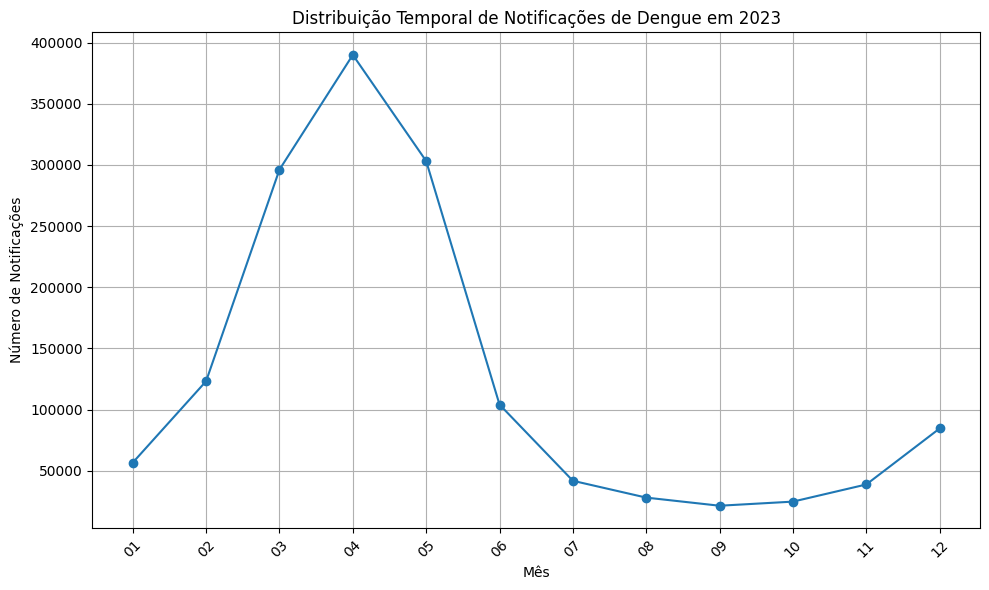

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(notificacoes_mes.index, notificacoes_mes.values, marker='o', linestyle='-')
plt.title('Distribuição Temporal de Notificações de Dengue em 2023')
plt.xlabel('Mês')
plt.ylabel('Número de Notificações')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##**Número de Notificações por UF:**



In [ ]:
notificacoes_por_uf = df_dengue['SG_UF_NOT'].value_counts()

In [ ]:
print("Número de Notificações por UF:")
print(notificacoes_por_uf)

Número de Notificações por UF:
SG_UF_NOT
31    406701
35    337295
41    210847
42    142060
52     70766
33     49700
29     47479
50     45119
53     42179
43     38757
51     28595
23     14475
11     10703
26      7837
12      7730
24      7668
22      7624
25      7217
13      6356
15      5881
21      4809
27      4788
17      3297
28      2948
16      1222
14       224
Name: count, dtype: int64


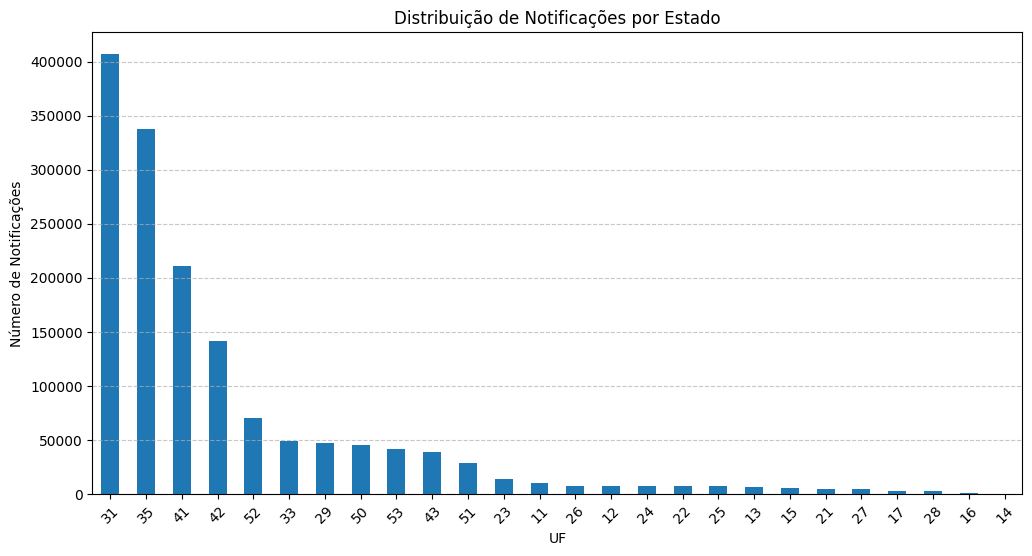

In [ ]:
plt.figure(figsize=(12, 6))
notificacoes_por_uf.plot(kind='bar')
plt.title('Distribuição de Notificações por Estado')
plt.xlabel('UF')
plt.ylabel('Número de Notificações')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

##**Distribuição de Notificações por Faixa Etária:**


In [ ]:
notificacoes_por_faixa_etaria = df_dengue['NU_IDADE_N'].value_counts().sort_index()

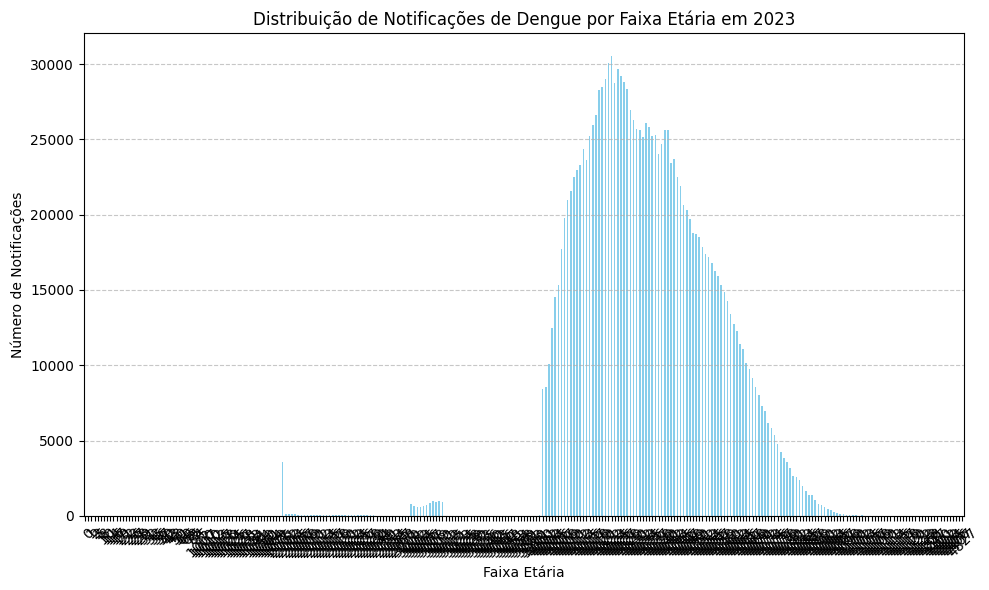

In [ ]:
plt.figure(figsize=(10, 6))
notificacoes_por_faixa_etaria.plot(kind='bar', color='skyblue')
plt.title('Distribuição de Notificações de Dengue por Faixa Etária em 2023')
plt.xlabel('Faixa Etária')
plt.ylabel('Número de Notificações')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##**Distribuição de Notificações por Gênero:**

In [ ]:
notificacoes_por_genero = df_dengue['CS_SEXO'].value_counts()

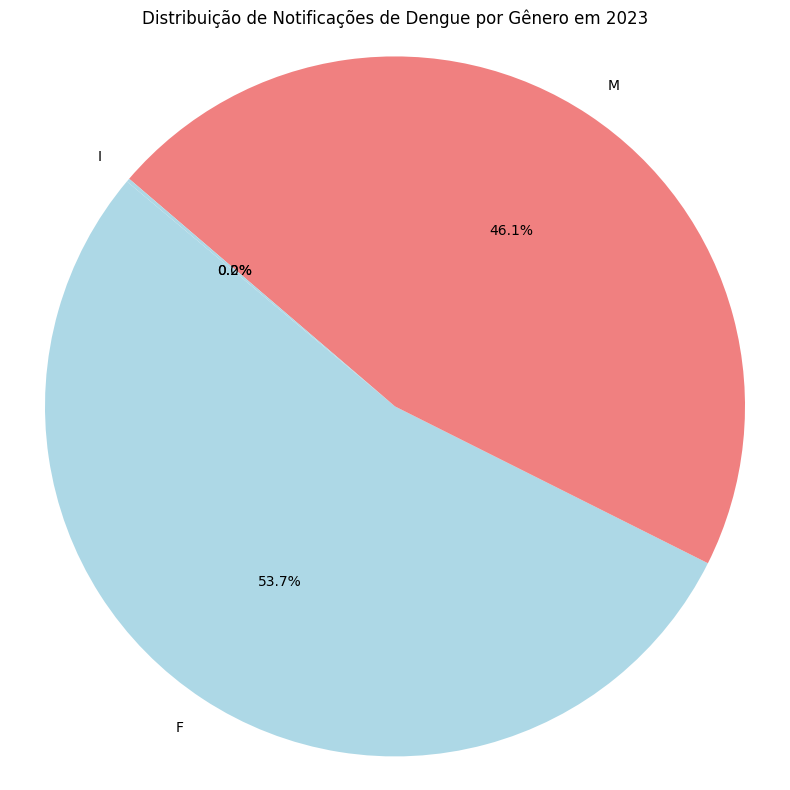

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(notificacoes_por_genero, labels=notificacoes_por_genero.index, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightcoral'])
plt.title('Distribuição de Notificações de Dengue por Gênero em 2023')
plt.axis('equal')
plt.tight_layout()
plt.show()

##**Evolução Temporal das Notificações por Estado:**

In [ ]:
notificacoes_estado_mes = df_dengue.groupby(['SG_UF_NOT', 'Mes_Notificacao']).size().unstack(fill_value=0)

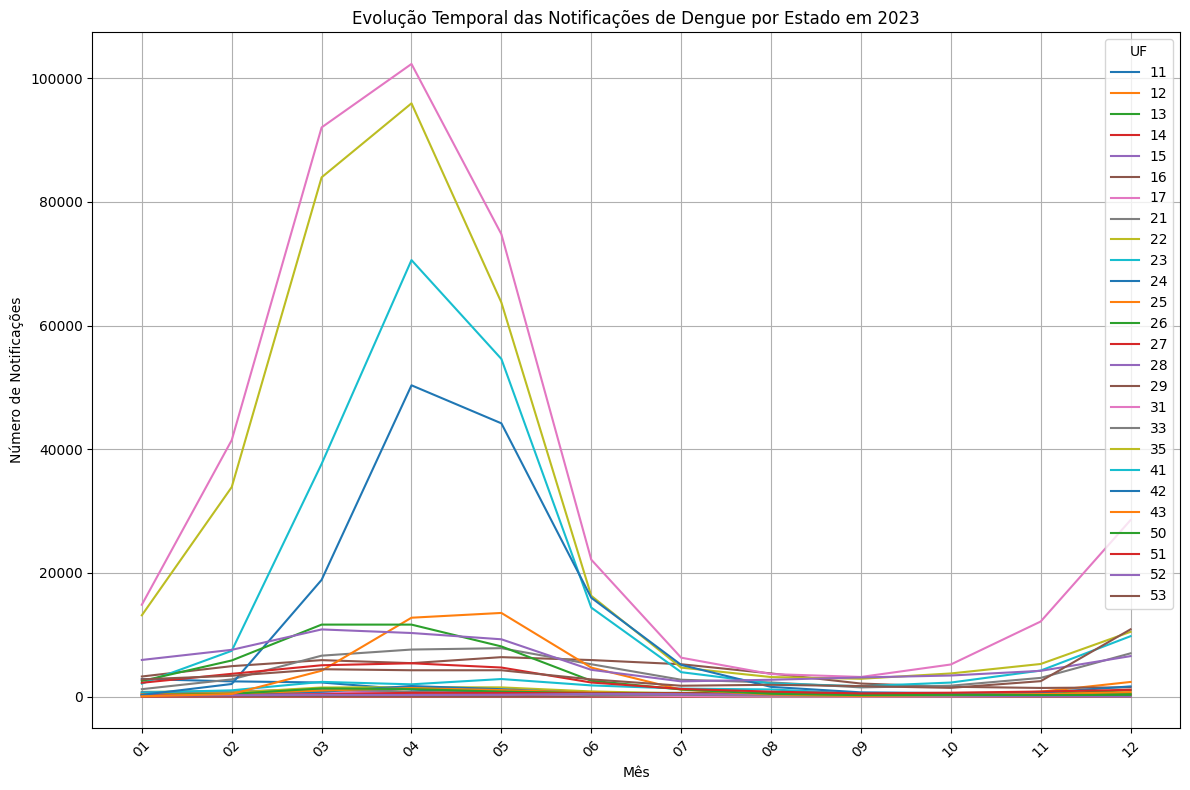

In [ ]:
plt.figure(figsize=(12, 8))
for uf in notificacoes_estado_mes.index:
    plt.plot(notificacoes_estado_mes.columns, notificacoes_estado_mes.loc[uf], label=uf)

plt.title('Evolução Temporal das Notificações de Dengue por Estado em 2023')
plt.xlabel('Mês')
plt.ylabel('Número de Notificações')
plt.legend(title='UF')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#**Dicionário de dados**

TP_NOT:

- Tipo de dado: Int
- Descrição: Código que representa o tipo de notificação.
- Observações: Pode incluir diferentes tipos de notificações relacionadas à dengue.

ID_AGRAVO:

- Tipo de dado: Varchar
- Descrição: Identificador do agravo.
- Observações: Representa o tipo específico de agravo relacionado à dengue.

DT_NOTIFIC:

- Tipo de dado: Date
- Descrição: Data da notificação.
- Observações: Indica quando a notificação foi registrada.

SEM_NOT:

- Tipo de dado: Int
- Descrição: Semana epidemiológica da notificação.
- Observações: Indica a semana epidemiológica em que a notificação foi feita.

NU_ANO:

- Tipo de dado: Year
- Descrição: Ano da notificação.
- Observações: Indica o ano em que a notificação foi feita.

SG_UF_NOT:

- Tipo de dado: int
- Descrição: unidade federativa da notificação.
- Observações: Representa o estado onde a notificação foi feita.

ID_MUNICIP:

- Tipo de dado: Int
- Descrição: Identificador do município da notificação.
- Observações: Representa o município onde a notificação foi feita.

ID_REGIONA:

- Tipo de dado: Int
- Descrição: Identificador da região da notificação.
- Observações: Pode representar uma divisão administrativa regional.

ID_UNIDADE:

- Tipo de dado: Int
- Descrição: Identificador da unidade de saúde.
- Observações: Pode representar o local onde a notificação foi registrada.

DT_SIN_PRI:

- Tipo de dado: Date
- Descrição: Data do início dos sintomas.
- Observações: Indica quando os sintomas começaram a se manifestar.

EVIDENCIA:

- Tipo de dado: Varchar
- Descrição: Indicador de evidência da doença.
- Observações: Pode indicar se há evidências clínicas ou laboratoriais da doença.

PLAQ_MENOR:

- Tipo de dado: Int
- Descrição: Contagem de plaquetas menor.
- Observações: Representa a contagem de plaquetas mínima no paciente.

CON_FHD:

- Tipo de dado: Varchar
- Descrição: Condição de febre hemorrágica.
- Observações: Indica se o paciente apresenta condições relacionadas à febre hemorrágica.

COMPLICA:

- Tipo de dado: Varchar
- Descrição: Indicador de complicações.
- Observações: Pode indicar se houve complicações no quadro clínico do paciente.

TP_SISTEMA:

- Tipo de dado: Int
- Descrição: Tipo de sistema.
- Observações: Pode indicar o tipo de sistema de saúde ou de notificação - utilizado.

NDUPLIC_N:

- Tipo de dado: Int
- Descrição: Número de duplicatas na notificação.
- Observações: Indica o número de notificações duplicadas.

DT_DIGITA:

- Tipo de dado: Date
- Descrição: Data de digitação da notificação.
- Observações: Indica quando a notificação foi digitada no sistema.

CS_FLXRET:

- Tipo de dado: Int
- Descrição: Código de fluxo de retorno.
- Observações: Pode indicar o status do fluxo de retorno da notificação.

FLXRECEBI:

- Tipo de dado: int
- Descrição: Indicador de fluxo recebido.
- Observações: Pode indicar se o fluxo foi recebido ou não.

MIGRADO_W:

- Tipo de dado: Varchar
- Descrição: Indicador de migração.
- Observações: Pode indicar se os dados foram migrados de outro sistema ou fonte.